# Exercise 8 - Evaluation

### F1 Score
F1 score is a metric used for measuring the performance of classification models when you have imbalanced data. The metric takes into account the type of errors — false positive and false negative – and not just the number of predictions that were incorrect.

F1 score computes the harmonic mean of precision and recall, where the relative contribution of both of these metrics are equal to F1 score. The F1 score ranges from 1 (perfect) to 0 (worst).

Precision is a model evaluation and performance metric that corresponds to the fraction of values that actually belong to a positive class out of all of the values which are predicted to belong to that class. Recall is a model evaluation and performance metric that corresponds to the fraction of values predicted to be of a positive class out of all the values that truly belong to the positive class (including false negatives).

**Precision**:  
$$\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}$$

**Recall**:  
$$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}$$

**F1 Score**:  
$$\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$


### F1 Score and LLMs
When evaluating prompt templates for large language models (LLMs), metrics like F-Score and F1 score are gaining prominence, as accuracy alone proves inadequate in scenarios with significant class imbalances. These scores, alongside precision and recall, are now widely applied to assess LLM performance on factors such as hallucinations, toxicity, RAG relevance, and other key dimensions.

### Task 1
#### Implement a function to compute the F1 Score

Use the following sample data to compute the F1 Score. 

In [4]:
ground_truth = [1,0,1,1,1,0,1,0,1,1]
prediction   = [1,1,1,0,1,0,1,1,1,0]

In [7]:
def compute_f1_score(ground_truth, prediction):
    # Your code
    pass

### Perplexity
Perplexity (PPL) is one of the most common metrics for evaluating language models. It is defined as the exponentiated average negative log-likelihood of a sequence, calculated with exponent base e.

**Perplexity**:  
$$\text{Perplexity} = \exp\left(-\frac{1}{N} \sum_{i=1}^N \log p(w_i)\right)$$

where N is the total number of words in the sequence log p(w_i) isrobability of the i-th word predicted by the model.
.

#### Setup for Task 2
Run these and start reading task 2 while it loads

In [9]:
!pip install -q bitsandbytes
!pip install -q git+https://github.com/huggingface/accelerate.git
!pip install -q git+https://github.com/huggingface/transformers.git

In [11]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from accelerate.test_utils.testing import get_backend
import torch
torch.manual_seed(0)

# Set device to CPU for now
device, _, _ = get_backend()

# Load model and tokenizer
model_id = 'gpt2'
model = AutoModelForCausalLM.from_pretrained(model_id).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Print model size
print(f"Model size: {model.get_memory_footprint():,} bytes")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Model size: 510,342,192 bytes


In [38]:
# Extract weights of the first layer
weights = model.transformer.h[0].attn.c_attn.weight.data
print("Original weights:")
print(weights)

Original weights:
tensor([[-0.4738, -0.2614, -0.0978,  ...,  0.0513, -0.0584,  0.0250],
        [ 0.0874,  0.1473,  0.2387,  ..., -0.0525, -0.0113, -0.0156],
        [ 0.0039,  0.0695,  0.3668,  ...,  0.1143,  0.0363, -0.0318],
        ...,
        [-0.2592, -0.0164,  0.1991,  ...,  0.0095, -0.0516,  0.0319],
        [ 0.1517,  0.2170,  0.1043,  ...,  0.0293, -0.0429, -0.0475],
        [-0.4100, -0.1924, -0.2400,  ..., -0.0046,  0.0070,  0.0198]],
       device='mps:0')


### Task 2
Use your implementation for Zero-Point Quantization to quantize the first layer extracted in the above cell and compare it to the original weights.

In [39]:
def zeropoint_quantize(X):
    # Your code here
    pass

weights_zp_quant, _ = zeropoint_quantize(weights)
print("\nZero-point quantized weights:")
print(weights_zp_quant)


Zero-point quantized weights:
tensor([[-20, -11,  -3,  ...,   3,  -2,   2],
        [  5,   8,  12,  ...,  -1,   0,   0],
        [  1,   4,  18,  ...,   6,   3,   0],
        ...,
        [-11,   0,  10,  ...,   1,  -1,   2],
        [  8,  11,   6,  ...,   2,  -1,  -1],
        [-18,  -8, -10,  ...,   1,   1,   2]], device='mps:0',
       dtype=torch.int8)


### Task 3
Use the deep copy of the original model (below) and quantize the model using ZP Quantization (all weights). \
Store the quantized weights in the variable `weights_zp` which will be used later for visulaization.

In [40]:
import numpy as np
from copy import deepcopy

# Store original weights
weights = [param.data.clone() for param in model.parameters()]

# Copy model to quantize using ZP 
model_zp = deepcopy(model)

# Quantize all model weights
weights_zp = []
# Your code here

#### Original vs ZP Quantized Weights - Visualisation

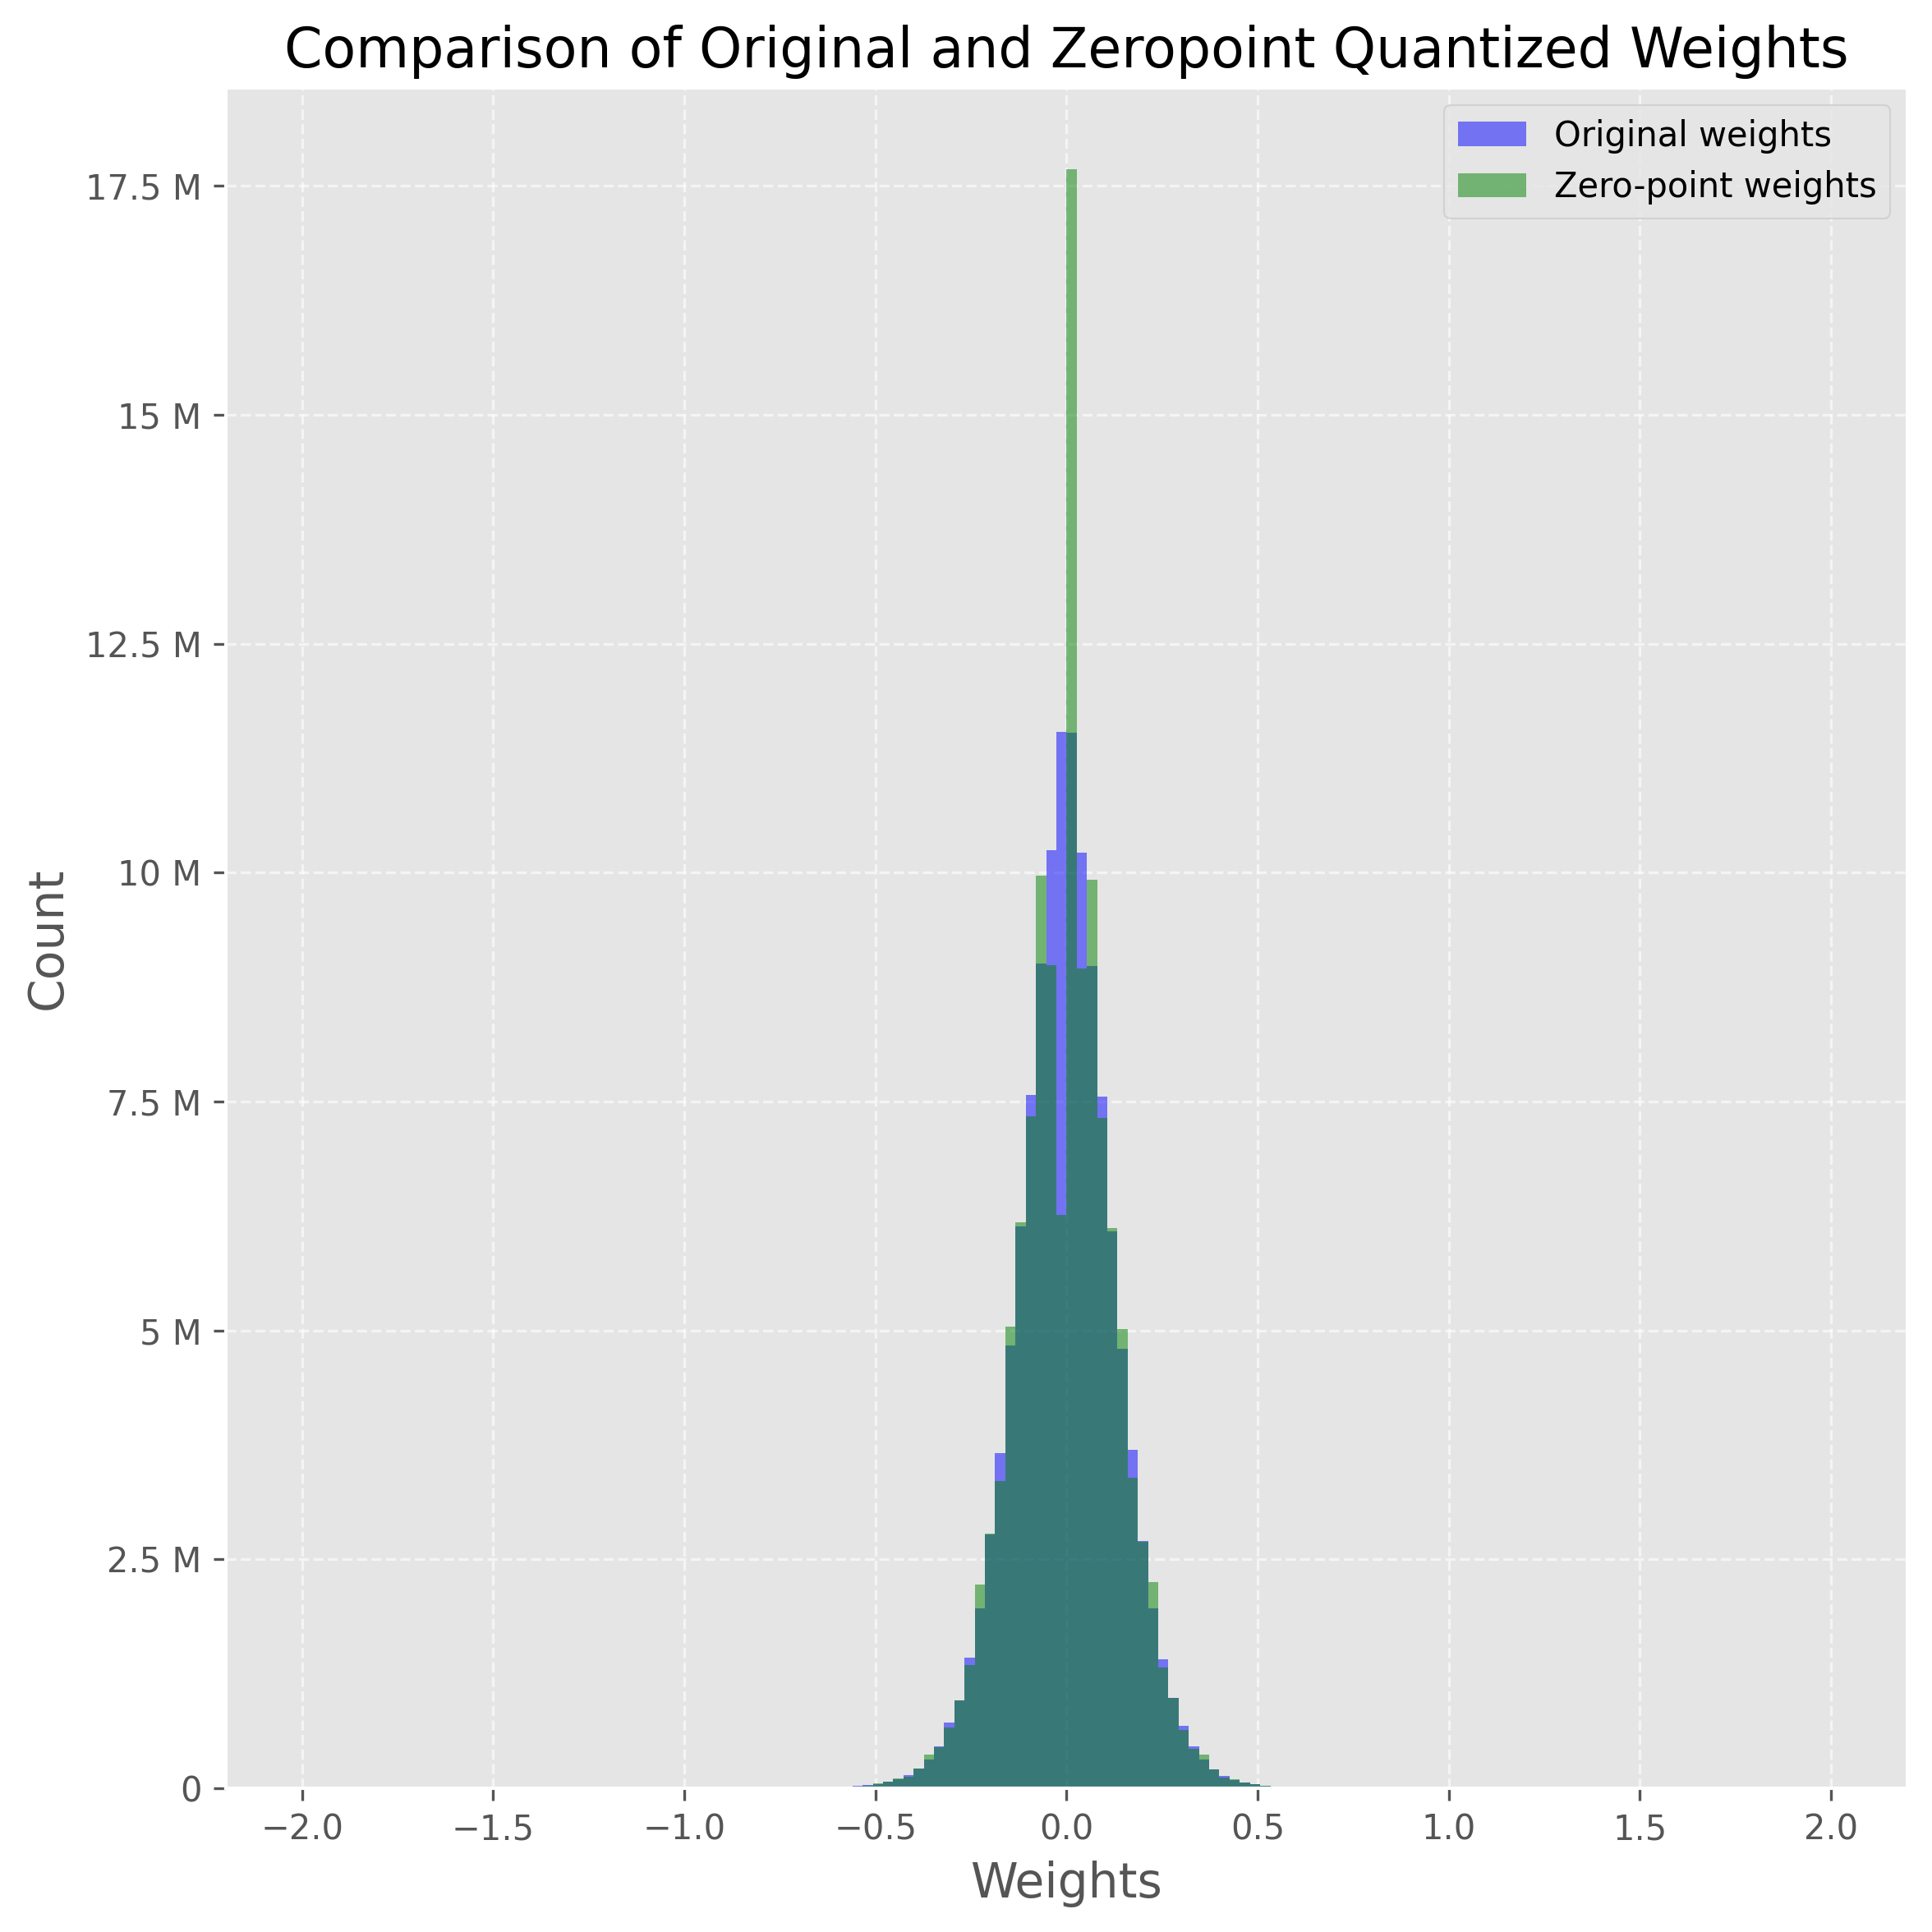

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np  # Assuming np is already imported

# Flatten weight tensors
weights = np.concatenate([t.cpu().numpy().flatten() for t in weights])
weights_zp = np.concatenate([t.cpu().numpy().flatten() for t in weights_zp])

# Set background style
plt.style.use('ggplot')

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)

# Plot the histograms for original and zero-point weights
ax.hist(weights, bins=150, alpha=0.5, label='Original weights', color='blue', range=(-2, 2))
ax.hist(weights_zp, bins=150, alpha=0.5, label='Zero-point weights', color='green', range=(-2, 2))

# Add grid
ax.grid(True, linestyle='--', alpha=0.6)

# Add legend
ax.legend()

# Add title and labels
ax.set_title('Comparison of Original and Zeropoint Quantized Weights', fontsize=16)
ax.set_xlabel('Weights', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Improve font
plt.rc('font', size=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Task 4
Implement a function that calculates the perplexity metric given a model and some text. \
Use this function to compare the perplexity of the origianl and quantized model. \
You can use the provided `generate_text` function to generate text for the original and the quantized model.

In [42]:
def generate_text(model, input_text, max_length=50):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)
    output = model.generate(inputs=input_ids,
                            max_length=max_length,
                            do_sample=True,
                            top_k=30,
                            pad_token_id=tokenizer.eos_token_id,
                            attention_mask=input_ids.new_ones(input_ids.shape))
    return tokenizer.decode(output[0], skip_special_tokens=True)

# Generate text with original and quantized models
original_text = generate_text(model, "I have a dream")
zp_text       = generate_text(model_zp, "I have a dream")

print(f"Original model:\n{original_text}")
print("-" * 50)
print(f"Zeropoint model:\n{zp_text}")

Original model:
I have a dream on this planet: I'm going to go home and be a father. It's time to live in it. And here I am and all I'm saying is, "It's time to live on it and it's time
--------------------------------------------------
Zeropoint model:
I have a dream of being able to do the things you wanted to do."

For more information

Get to know the new, world-famous Niki López.

Get to know Niki López (born


In [43]:
def calculate_perplexity(model, text):
    #Your code here

In [44]:
ppl     = calculate_perplexity(model, original_text)
ppl_zp  = calculate_perplexity(model_zp, zp_text)

print(f"Original perplexity: {ppl.item():.2f}")
print(f"Zeropoint perplexity: {ppl_zp.item():.2f}")

Original perplexity: 11.87
Zeropoint perplexity: 12.00


### Bonus Task
Use int8 qunatization and see how the weights differ compared to the origianl and ZP qunatization. \
Visualize the weights using histograms. \
Compute the perplexity score and compare it with the orignal model and the ZP quantized model.